# IMPORT LIBRARIES AND DATASETS


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
kyphosis_df = pd.read_csv("C:\\Users\\anish\\Downloads\\kyphosis.csv")

In [4]:
kyphosis_df.head(10)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


In [5]:
kyphosis_df.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [6]:
kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [7]:
kyphosis_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


# PERFORMING DATA VISUALIZATION

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LabelEncoder_y = LabelEncoder()
kyphosis_df['Kyphosis'] = LabelEncoder_y.fit_transform(kyphosis_df['Kyphosis'])

In [9]:
kyphosis_df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [10]:
Kyphosis_True = kyphosis_df[kyphosis_df['Kyphosis']==1]

In [11]:
Kyphosis_False = kyphosis_df[kyphosis_df['Kyphosis']==0]

In [12]:
print( 'Disease present after operation percentage =', (len(Kyphosis_True) / len(kyphosis_df) )*100,"%")

Disease present after operation percentage = 20.98765432098765 %


<AxesSubplot:>

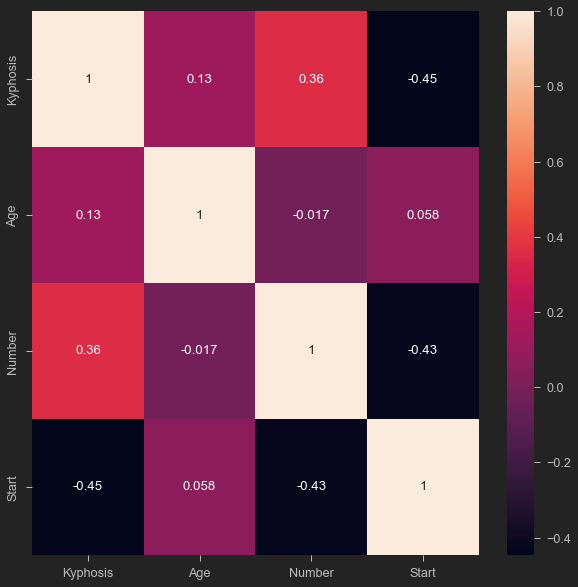

In [13]:
plt.figure(figsize=(10,10)) 
sns.heatmap(kyphosis_df.corr(), annot = True)

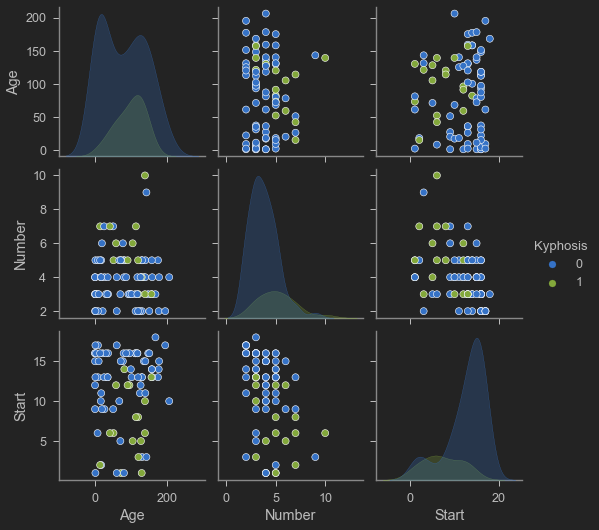

In [14]:
sns.pairplot(kyphosis_df, hue = 'Kyphosis')

<AxesSubplot:xlabel='Kyphosis', ylabel='count'>

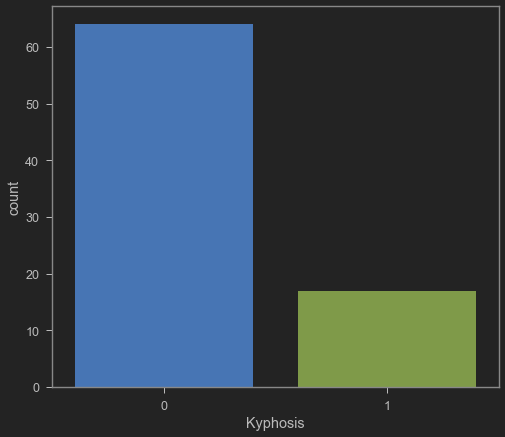

In [15]:
sns.countplot(x = kyphosis_df['Kyphosis'])

# DATA CLEANING

In [16]:
# Let's drop the target label coloumns
X = kyphosis_df.drop(['Kyphosis'], axis=1)
Y = kyphosis_df['Kyphosis']

In [17]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [18]:
Y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int32

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# TRAIN A LOGISTIC REGRESSION CLASSIFIER MODEL

In [22]:
X_train.shape

(64, 3)

In [23]:
Y_train.shape

(64,)

In [24]:
X_test.shape

(17, 3)

In [25]:
Y_test.shape

(17,)

In [26]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [27]:
LR.fit(X_train, Y_train)

LogisticRegression()

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

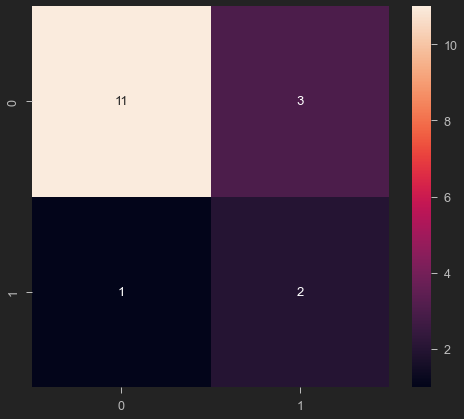

In [29]:
# Predicting the Test set results
Y_predict_test = LR.predict(X_test)
cm = confusion_matrix(Y_test, Y_predict_test)
sns.heatmap(cm, annot = True)

In [30]:
print(classification_report(Y_test, Y_predict_test))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.40      0.67      0.50         3

    accuracy                           0.76        17
   macro avg       0.66      0.73      0.67        17
weighted avg       0.83      0.76      0.79        17



# TRAIN A DECISION TREE MODEL

In [31]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)

DecisionTreeClassifier()

<AxesSubplot:>

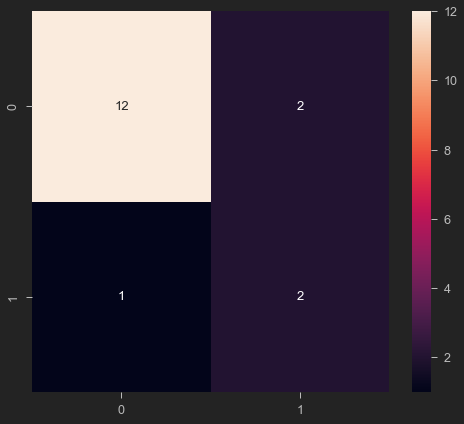

In [32]:
# Predicting the Test set results
Y_predict_test_decision = decision_tree.predict(X_test)
cm = confusion_matrix(Y_test, Y_predict_test_decision)
sns.heatmap(cm, annot=True)

In [33]:
print(classification_report(Y_test, Y_predict_test_decision))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.50      0.67      0.57         3

    accuracy                           0.82        17
   macro avg       0.71      0.76      0.73        17
weighted avg       0.85      0.82      0.83        17



In [34]:
feature_importances = pd.DataFrame(decision_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

print(feature_importances)

        importance
Start     0.513588
Age       0.256159
Number    0.230253


# TRAIN A RANDOM FOREST CLASSIFIER MODEL

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
RF = RandomForestClassifier()

In [37]:
RF.fit(X_train, Y_train)

RandomForestClassifier()

In [38]:
Y_predict_RF = RF.predict(X_test)

<AxesSubplot:>

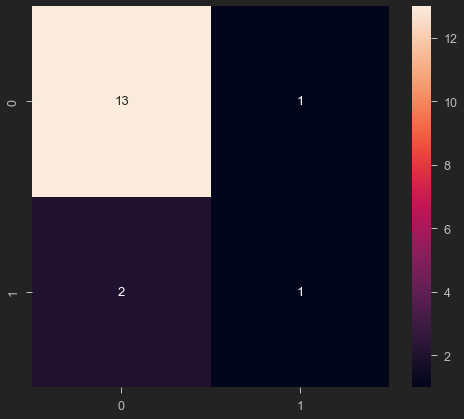

In [39]:
cm = confusion_matrix(Y_test, Y_predict_RF)
sns.heatmap(cm, annot=True)

In [40]:
print(classification_report(Y_test, Y_predict_RF))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.50      0.33      0.40         3

    accuracy                           0.82        17
   macro avg       0.68      0.63      0.65        17
weighted avg       0.80      0.82      0.81        17

